**Project Name**: Banking Analytics - Predicting Deposit Subscriber

**Author**: Ankur Dhamija

**Connect on Linkedin**: https://www.linkedin.com/in/ankurdhamija/

--------

# Banking Analytics - Predicting Deposit Subscriber

-------

# 1. About the dataset

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 
means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



------

## 2. Goal

*The `classification goal` is to `predict` if the `client will subscribe a term deposit` (variable y).*

-----

## Key Findings

- XXX

---------

## 3. Approach
- Load the required libraries
- Load the dataset
- Overview of the dataset
- Data Manipulation
- Exploratory Data Analysis
- Data Pre-Processing
- Model Selection
- Recursive Feature Elimination
- Select Features
- Model Tuning - Hyperparameter optimization
- Final Model
- Evaluate Final Model

## 4. Load the required libraries

In [1]:
#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import required modules
from pandas_profiling import ProfileReport
import missingno as msno

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Pre-Processing libraries
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion, Pipeline

#Sk-Learn Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Sk-Learn Model Selection
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from scipy import stats

In [3]:
#Set Seaborn Theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_style("darkgrid")

In [4]:
#Setting to display Pipeline
from sklearn import set_config
set_config(display="diagram")

-------

## 5. Load the dataset

In [5]:
df = pd.read_csv("data/bank-additional-full.csv", sep=";")

In [6]:
#Visualize the dataframe
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

--------

## 6. Overview of the dataset

In [7]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

### Check for missing values

<AxesSubplot:>

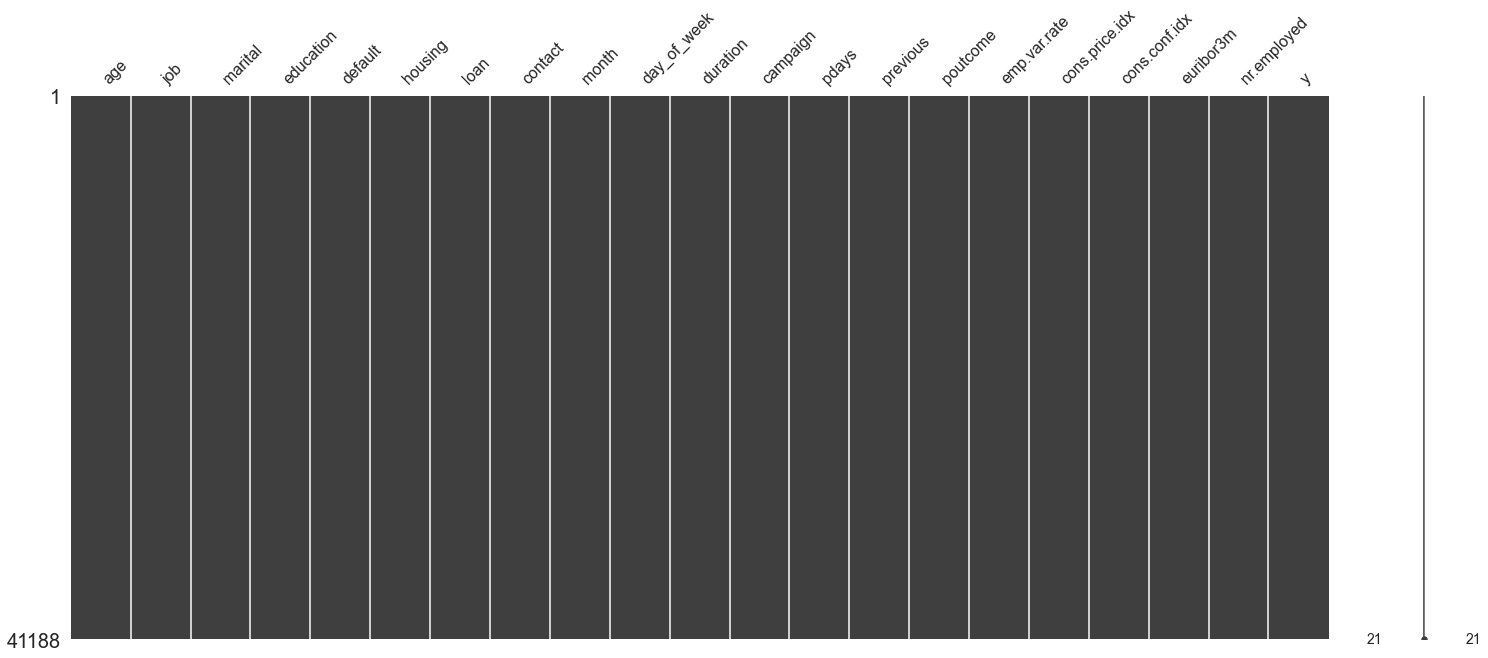

In [8]:
# Visualize missing values as a matrix
msno.matrix(df)

-----

## 7. Data manipulation

### 7.1 Rename columns

In [9]:
#

### 7.2 Move target variable to the beginning of the dataset

In [10]:
# # Moving the reponse variable "turnover" to the front of the table
# front = df['turnover']
# df.drop(labels=['turnover'], axis=1,inplace = True)
# df.insert(0, 'turnover', front)
# df.head()

### 7.3 Check and remove duplicates

In [11]:
# Check for numbe of duplicates in the dataset
print(df.duplicated().sum())

12


In [12]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
# Check for numbe of duplicates in the dataset
print(df.duplicated().sum())

0


-----

## 8. Dataset Overview - Exploratory Data Analysis

<blockquote><b>Only 11% of the customers</b> contacted successfully subscribed to a term deposit.</blockquote>

In [14]:
#Customers who successfully subscribed to a term deposit
"{:.2f}".format(df["y"].value_counts()["yes"]/(df["y"].value_counts()["yes"]+df["y"].value_counts()["no"]))

'0.11'

NameError: name 'd' is not defined

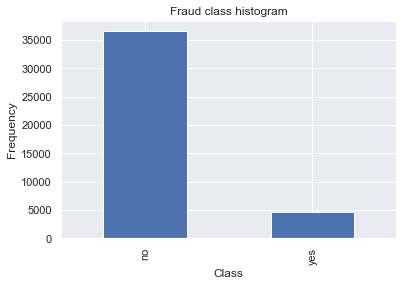

In [15]:
pd.value_counts(df['y']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
d['Class'].value_counts()

### 8.1 X

In [ ]:
df.head()

---------

## 9. Data Pre-Processing (Dummy variables, Test-Train split and Feature Scaling)

### 9.1 Create train-test split

In [ ]:
#Split the train and test data
train, test =  train_test_split(df,test_size=0.2, random_state=123)
print(train.shape)
print(test.shape)

In [ ]:
train["y"].value_counts()

In [ ]:
y_train

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X_train, y_train)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df["satisfaction"].max()

### 9.2 Custom Pre-Processing Transformers

In [ ]:
#Get the list of categorical columns for Dummy Encoding 
dummyColList = ['department', 'salary']

In [ ]:
#Get the list of numerical columns for Scaling
numCols = ['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany']

In [ ]:
#Custom Transformer that transforms Categorical columns
class DummyEncoding( BaseEstimator, TransformerMixin):
    
    #Class Constructor
    def __init__(self, dummyColList):
        self.dummyColList = dummyColList
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        return self
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        
        #One-Hot Encoding of categorical columns
        #Get dummy variables
        for each_col in self.dummyColList:
            X[each_col] = pd.factorize(X[each_col])[0]
        
        return X

In [ ]:
#Custom Transformer that scales Numerical columns
class CustomScaler( BaseEstimator, TransformerMixin):
    
    #Class Constructor
    def __init__(self, numCols):
        self.numCols = numCols
        self.scaler = MinMaxScaler()
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        self.scaler.fit(X[numCols])
        return self
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        
        X[numCols] = self.scaler.transform(X[numCols])
        
        return X

### 9.3 Pre-Processing pipeline

In [ ]:
#Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline( steps = [('dummyEncodingTransformer', DummyEncoding(dummyColList))] )

In [ ]:
#Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline( steps = [ ( 'min_max_scaler', CustomScaler(numCols)) ] )

In [ ]:
#Combining numerical and categorical piepline into one full big pipeline horizontally 
#using FeatureUnion
preProcessingPipeline = Pipeline( steps = [ ( 'categorical_pipeline', categorical_pipeline ), 
                                                  
                                                  ( 'numerical_pipeline', numerical_pipeline ) ] )



In [ ]:
preProcessingPipeline

In [ ]:
#Fit_transform the pipeline on training data
train_transform = preProcessingPipeline.fit_transform(train)

In [ ]:
#Transform the pipeline on test data
test_transform = preProcessingPipeline.transform(test)

In [ ]:
train_transform.head()

### 9.4 Extract X and y

In [ ]:
# Putting response variable to y
y_train = train_transform.pop('turnover')
X_train = train_transform

In [ ]:
# Putting response variable to y
y_test = test_transform.pop('turnover')
X_test = test_transform

-------

## 10. Model Selection

### 10.1 List of Models

In [ ]:
#List of models to evaluate
models = [LogisticRegression(), 
          RidgeClassifier(), 
          SGDClassifier(), 
          CategoricalNB(), 
          DecisionTreeClassifier()]

#Model names
names = ["LogisticRegression", "Ridge", "SGD", "NaiveBayes", "KNN", "DecisionTree"]

### 10.2 Create Models Class

In [ ]:
class Models:
    
    def __init__(self, models, names, min_features, max_features, scoring):
        
        #Models Constructor
        self.models = models
        self.names = names
        self.min_features = min_features
        self.max_features = max_features
        self.scoring = scoring
        
        
    #Function to runModels
    def runModels(self):
        self.results = []
        
        for model, name in zip(self.models, self.names):
            kfold = KFold(n_splits=10, random_state=42, shuffle=True)
            cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=self.scoring)
            self.results.append(cv_results)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
            
    #Function to compare Model results        
    def compareModels(self):
        # Compare Algorithms
        fig = plt.figure()
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(self.results)
        ax.set_xticklabels(self.names)
        plt.show()
        
        
    #Get shortlisted Model
    def shortlistedModel(self, model):
        self.selectModel = model
        
    
    #Get the list of RFE Models
    def getRfeModels(self):
        self.models = []
        self.names = []
        for i in range(self.min_features, self.max_features):
            rfe = RFE(estimator=self.selectModel, n_features_to_select=i)
            self.models.append(Pipeline(steps=[('selection',rfe),('model',self.selectModel)]))
            self.names.append(i)
            
    #Set optimial number of features based on RFE Model
    def setOptimalNumFeatures(self, rfeNumFeatures):
        self.optimalFeatures = rfeNumFeatures
    
    #Run shortlisted RFE Model to find the names of optimal features
    def getBestFeatures(self):
        rfe = RFE(estimator=self.selectModel, n_features_to_select=self.optimalFeatures)
        self.pipe = Pipeline(steps=[('selection',rfe), ('model', self.selectModel)])
        self.pipe.fit(X_train, y_train)
    
        # summarize all features
        print("Summarizing the results of RFE")
        for each_col, col_num in zip(X_train.columns, list(range(X_train.shape[1]))):
            print('ColumnName: %s | Selected %s | Rank: %.3f' % (each_col, rfe.support_[col_num], rfe.ranking_[col_num]))
            
        
        print("\n")
        print("List of selected columns")
        print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
        
        #Visualize the selected columns
        print("\n")
        print("Visualize selected columns")
        print(X_train.columns[rfe.support_])
        
        return X_train.columns[rfe.support_]
        
    def hyperParameterOptimization(self, params):
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator=self.selectModel, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = self.scoring)
        
        grid_search.fit(X_train_rfe, y_train)
        
        return grid_search.best_estimator_
    
    def runFinalModel(self):
        pass
    
    def evaluateModel(self):
        pass
        

In [ ]:
#Instantiate Models class
modelObj = Models(models, names, 1, 9, "recall")

In [ ]:
#Run the models and print score
modelObj.runModels()

In [ ]:
#Check the results
modelObj.results

### 10.3 Compare model performance

In [ ]:
#Plot the results
modelObj.compareModels()

### 11. Recursive Feature Elimination

In [ ]:
#Set the shortlisted Model
model = DecisionTreeClassifier()
modelObj.shortlistedModel(model)

In [ ]:
#RFE Model to find the optimial number of features in shortlisted Model
modelObj.getRfeModels()

In [ ]:
modelObj.runModels()

In [ ]:
modelObj.compareModels()

## 12. Select Features

In [ ]:
modelObj.setOptimalNumFeatures(5)

In [ ]:
selectColumns = modelObj.getBestFeatures()

In [ ]:
X_train_rfe = X_train[selectColumns]
X_test_rfe = X_test[selectColumns]

## 13. Model Tuning - Hyperparameter optimization

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
finalModel = modelObj.hyperParameterOptimization(params)

## 14. Final Model

In [ ]:
#Visualize the Final Model
finalModel

In [ ]:
#Fit the final Model
finalModel.fit(X_train_rfe, y_train)

In [ ]:
#Visualize the tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(finalModel,
                   feature_names=X_train_rfe.columns,
                   class_names=['Retained', "Attrition"],
                   filled=True)

In [ ]:
#Predictions on Final Model
y_test_pred = finalModel.predict(X_test_rfe)

## 15. Evaluate Final Model

In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels=finalModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=finalModel.classes_)
disp.plot()

plt.show()

## End of notebook